In [1]:
import pandas as pd

data_path = '../data/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col= 'id')

In [2]:
train.shape, test.shape

((300000, 25), (200000, 24))

In [3]:
train.head().T

,0,1,2,3,4
id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada


In [5]:
submission.head() # 0 또는 1이 될 확률을 입력해주자!

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


### EDA - 피쳐 요약표 만들기

In [7]:
def resumetable(df):
    print(f"데이터셋 형상: {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns = ['데이터타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})

    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values

    return summary
resumetable(train)

# bin: bin_3, bin_4 변환필요
# nom: nom_5 ~ nom_9의 고윳값 수가 많음.
# ord: ord 순서 파악을 위해 하나씩 분석해보자!!
# day, month, target: 별도 분석

데이터셋 형상: (300000, 25)


,피처,데이터타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,id,int64,0,300000,0,1,2
1,bin_0,int64,0,2,0,0,0
2,bin_1,int64,0,2,0,1,0
3,bin_2,int64,0,2,0,0,0
4,bin_3,object,0,2,T,T,F
5,bin_4,object,0,2,Y,Y,Y
6,nom_0,object,0,3,Green,Green,Blue
7,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
8,nom_2,object,0,6,Snake,Hamster,Lion
9,nom_3,object,0,6,Finland,Russia,Russia


In [9]:
for i in range(6):
    feature = 'ord_' + str(i)
    print(f"{feature} 고유값: {train[feature].unique()}")

ord_0 고유값: [2 1 3]
ord_1 고유값: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고유값: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']
ord_3 고유값: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고유값: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고유값: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'i

In [10]:
print('day 고유값:', train['day'].unique()) # 요일
print('month 고유값:', train['month'].unique()) # 1 ~ 12
print('target 고유값:', train['target'].unique()) # 이진분류, 우리의 목표

day 고유값: [2 7 5 4 3 1 6]
month 고유값: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고유값: [0 1]


### 시각화

In [11]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Target Distribution')

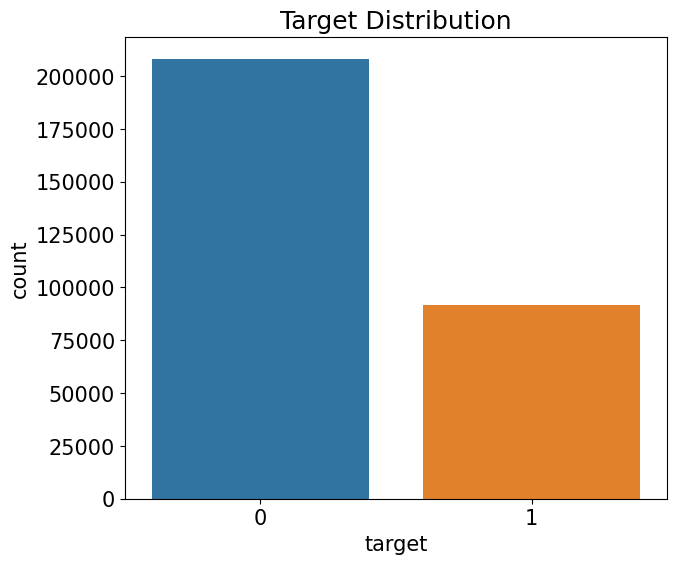

In [13]:
mpl.rc('font', size = 15)
plt.figure(figsize = (7, 6))
ax = sns.countplot(x = 'target', data = train)
ax.set_title('Target Distribution')

In [20]:
# 참고: 그래프 위에 글씨 작성하기

print(ax.patches)

rectangle = ax.patches[0]
print("사각형 높이: ", rectangle.get_height())
print("사각형 너비: ", rectangle.get_width())
print("왼쪽 테두리의 x위치: ", rectangle.get_x())


<Axes.ArtistList of 2 patches>
사각형 높이:  208236.0
사각형 너비:  0.8
왼쪽 테두리의 x위치:  -0.4


In [24]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃 값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size * 100

        ax.text(x = left_coord + width / 2.0,
                y = height + total_size*0.005,
                s = f'{percent:1.1f}%',
                ha = 'center')

Text(0.5, 1.0, 'Target Distribution')

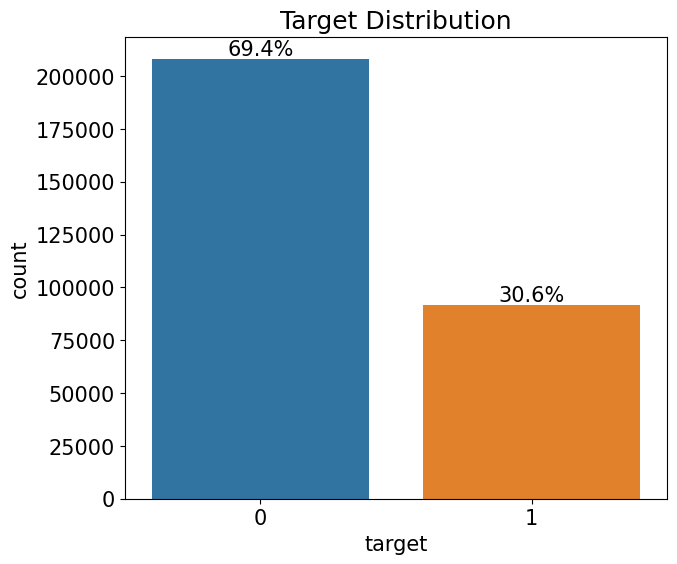

In [25]:
plt.figure(figsize = (7,6))
ax = sns.countplot(x = 'target', data = train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')


#### Binary Data 시각화

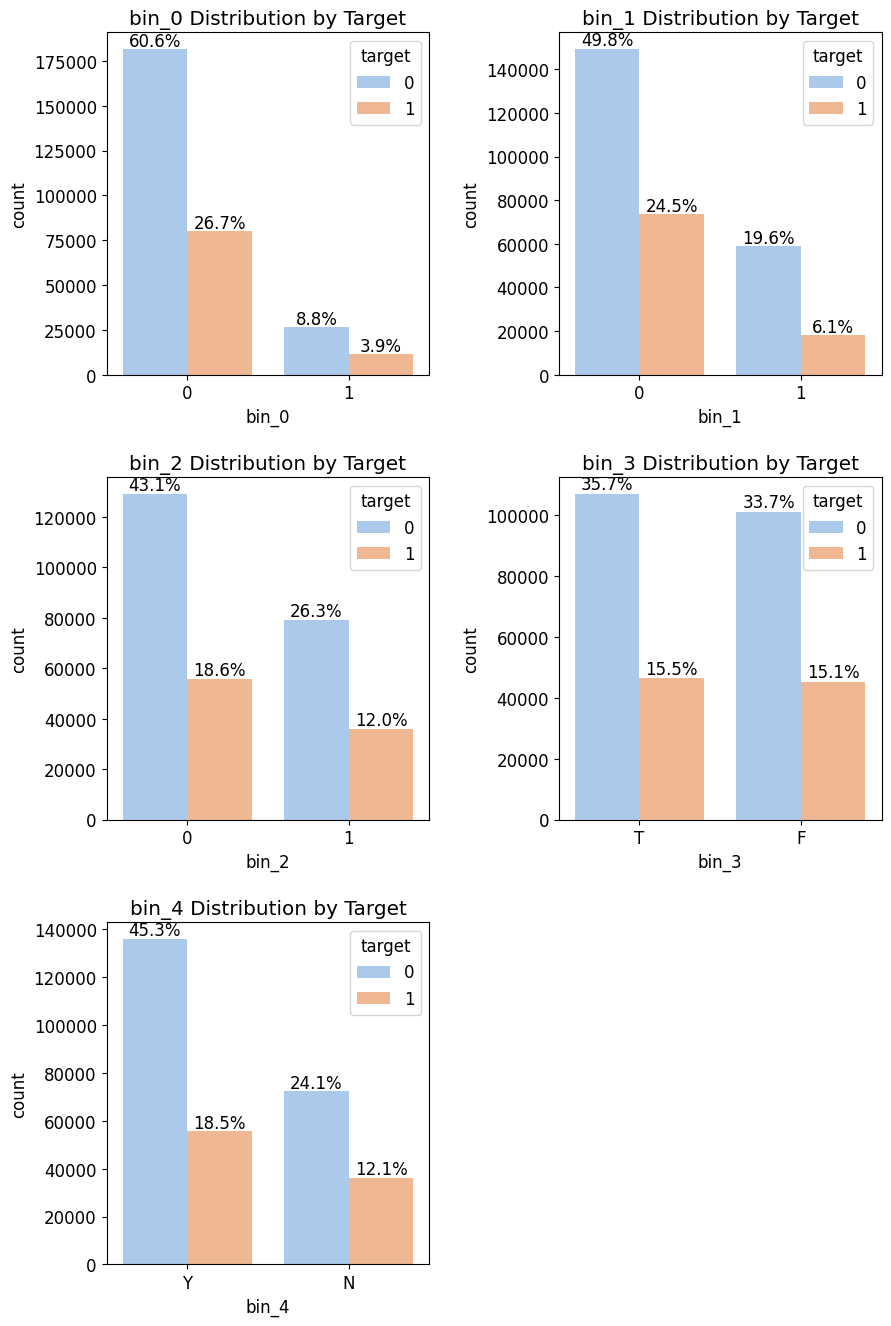

In [26]:
# 이진 피쳐 분포
import matplotlib.gridspec as gridspec

mpl.rc('font', size = 12)
grid = gridspec.GridSpec(3,2)
plt.figure(figsize=(10, 16))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])

    sns.countplot(x = feature, 
                  data = train,
                  hue = 'target',
                  palette = 'pastel',
                  ax = ax)
    
    ax.set_title(f'{feature} Distribution by Target')
    write_percent(ax, len(train))

#### Nominal Data 시각화

In [31]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    crosstab = crosstab.reset_index()
    return crosstab


In [33]:
crosstab = get_crosstab(train, 'nom_0')
crosstab # 여기서 타깃 값이 1인 Data만 활용하여 PointPlot을 그릴 예정

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [49]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=feature, y=1, data = crosstab, order=crosstab[feature].values, color='black')
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
    ax2.set_ylabel("Target 1 Ratio (%)")

In [50]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size = (15,20)):
    # 틀 짜기
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.45, hspace=0.3)

    # plot 그리기
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)

        # Plot 1. countplot
        sns.countplot(x=feature, data = df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax = ax)
        
        # 비율 추가
        write_percent(ax, len(df))
        # Plot 2. pointplot
        plot_pointplot(ax, feature, crosstab)

        ax.set_title(f"{feature} Distribution")

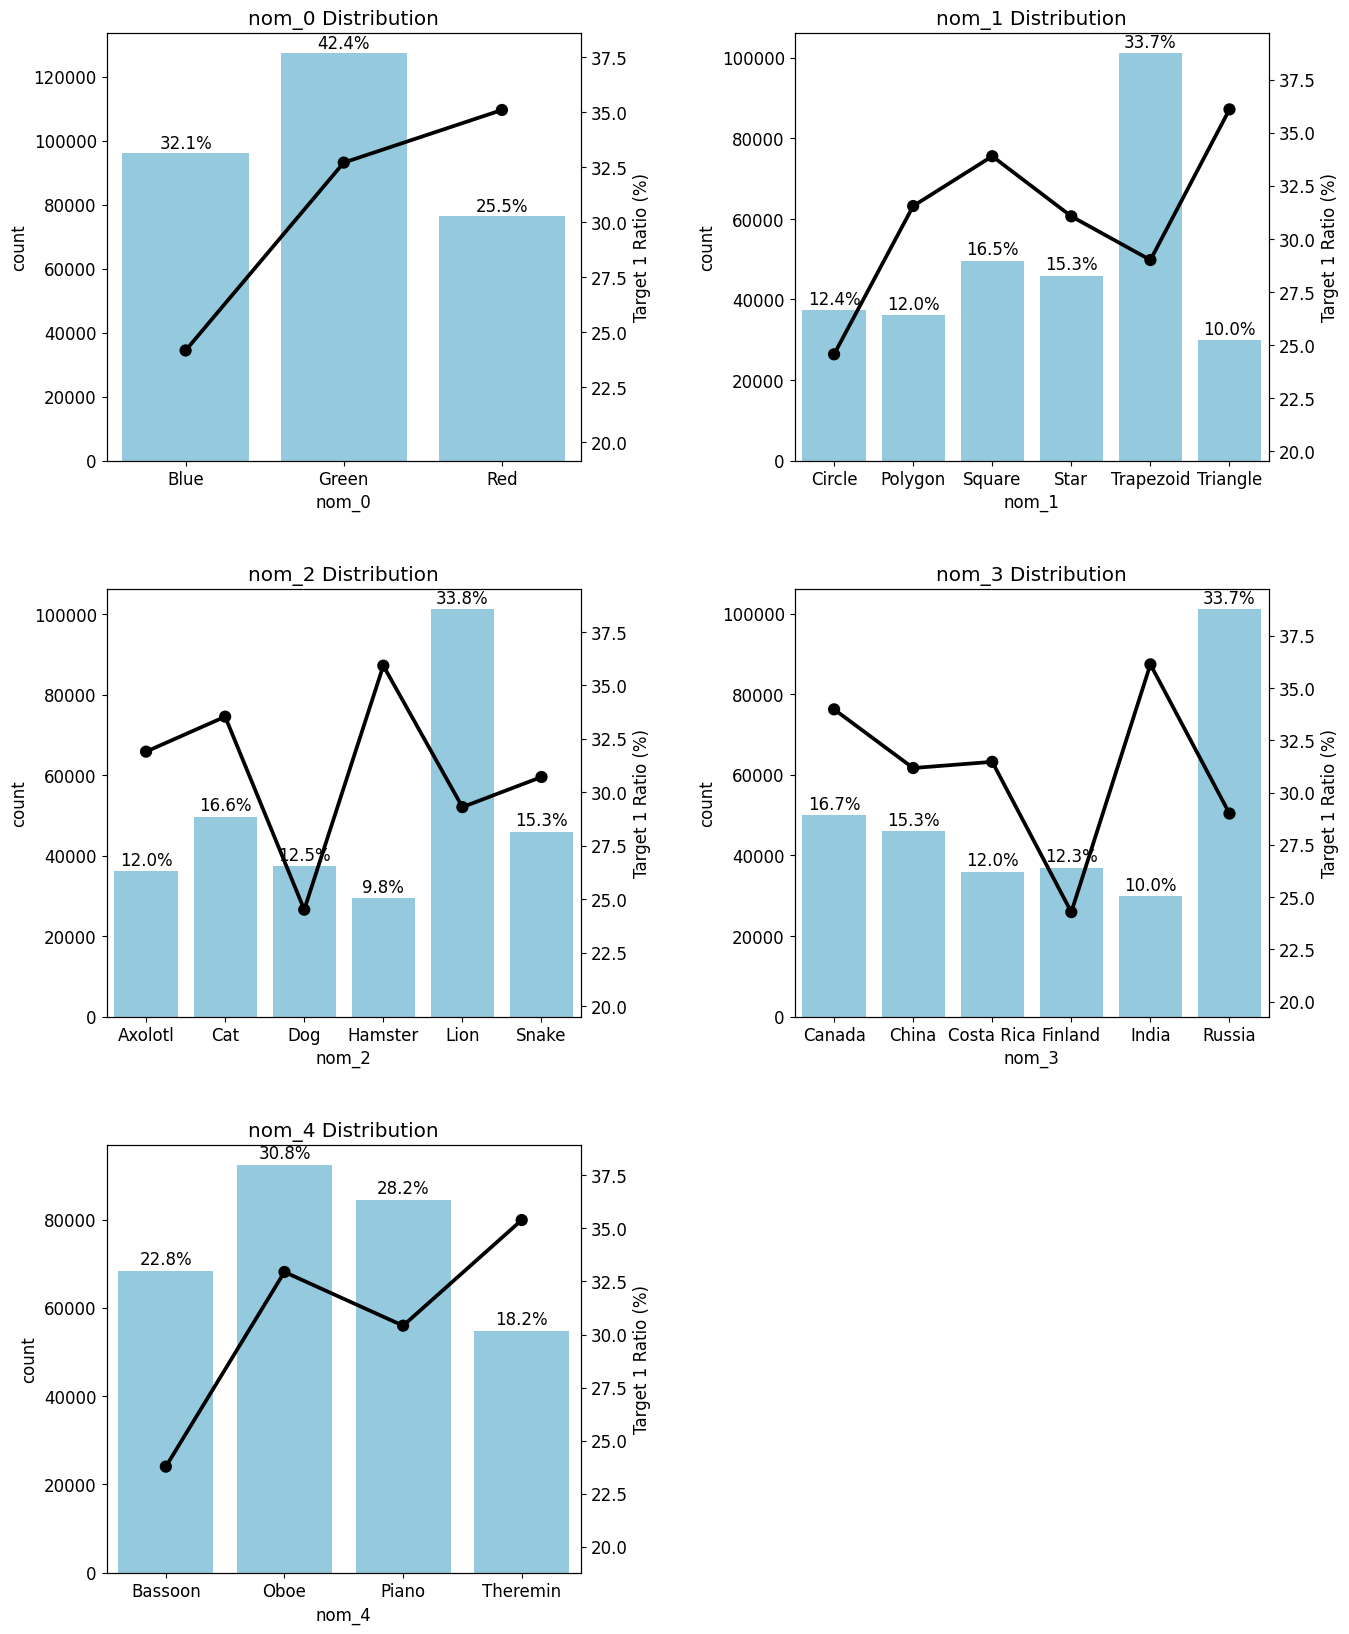

In [51]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

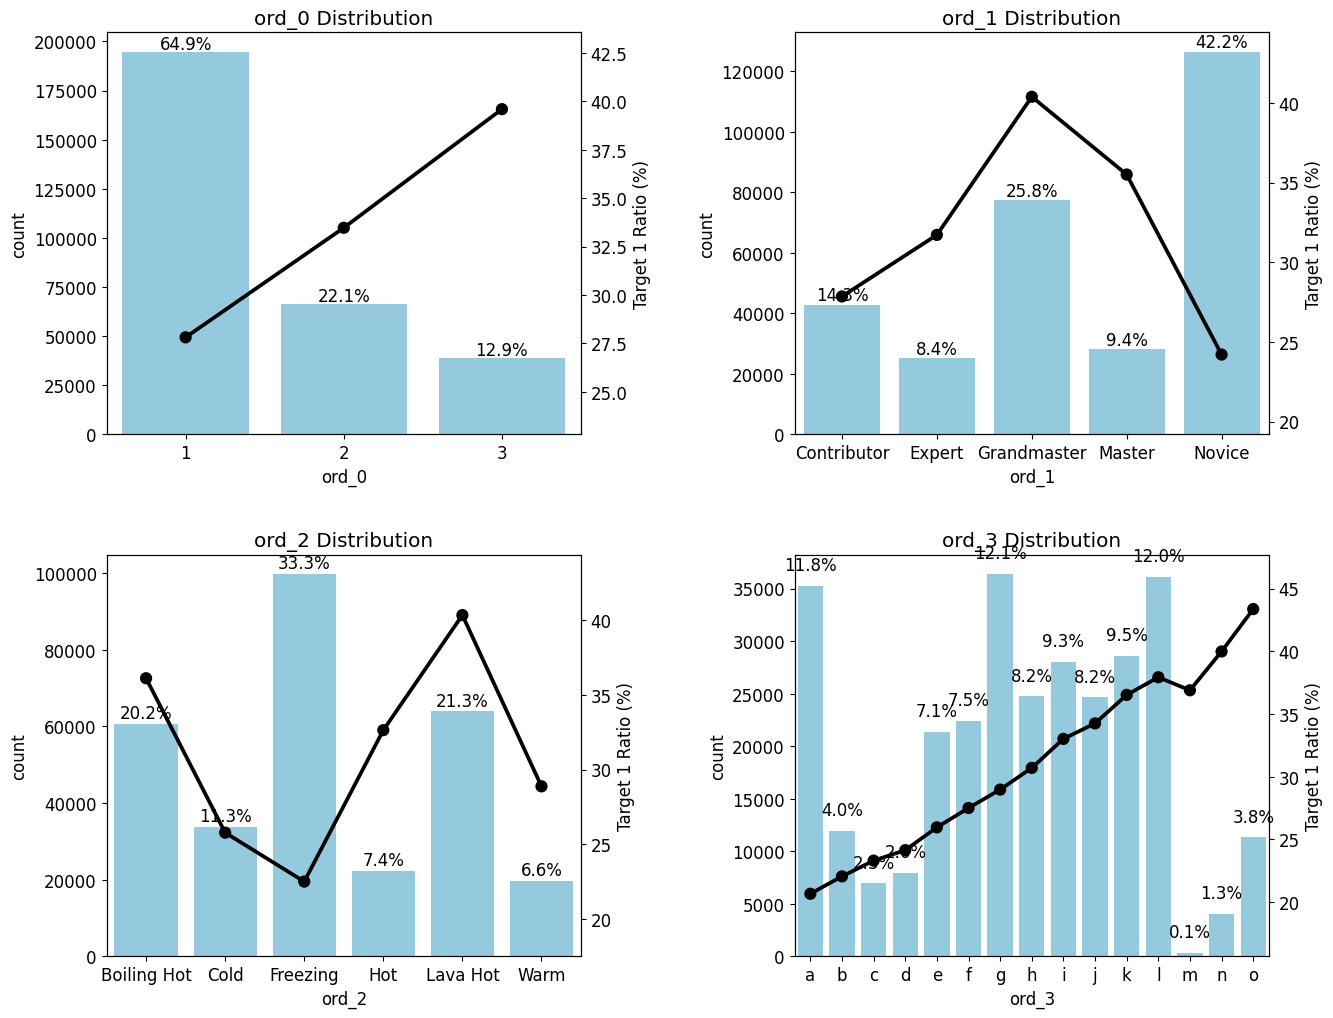

In [53]:
nom_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=2, num_cols=2, size=(15,12))

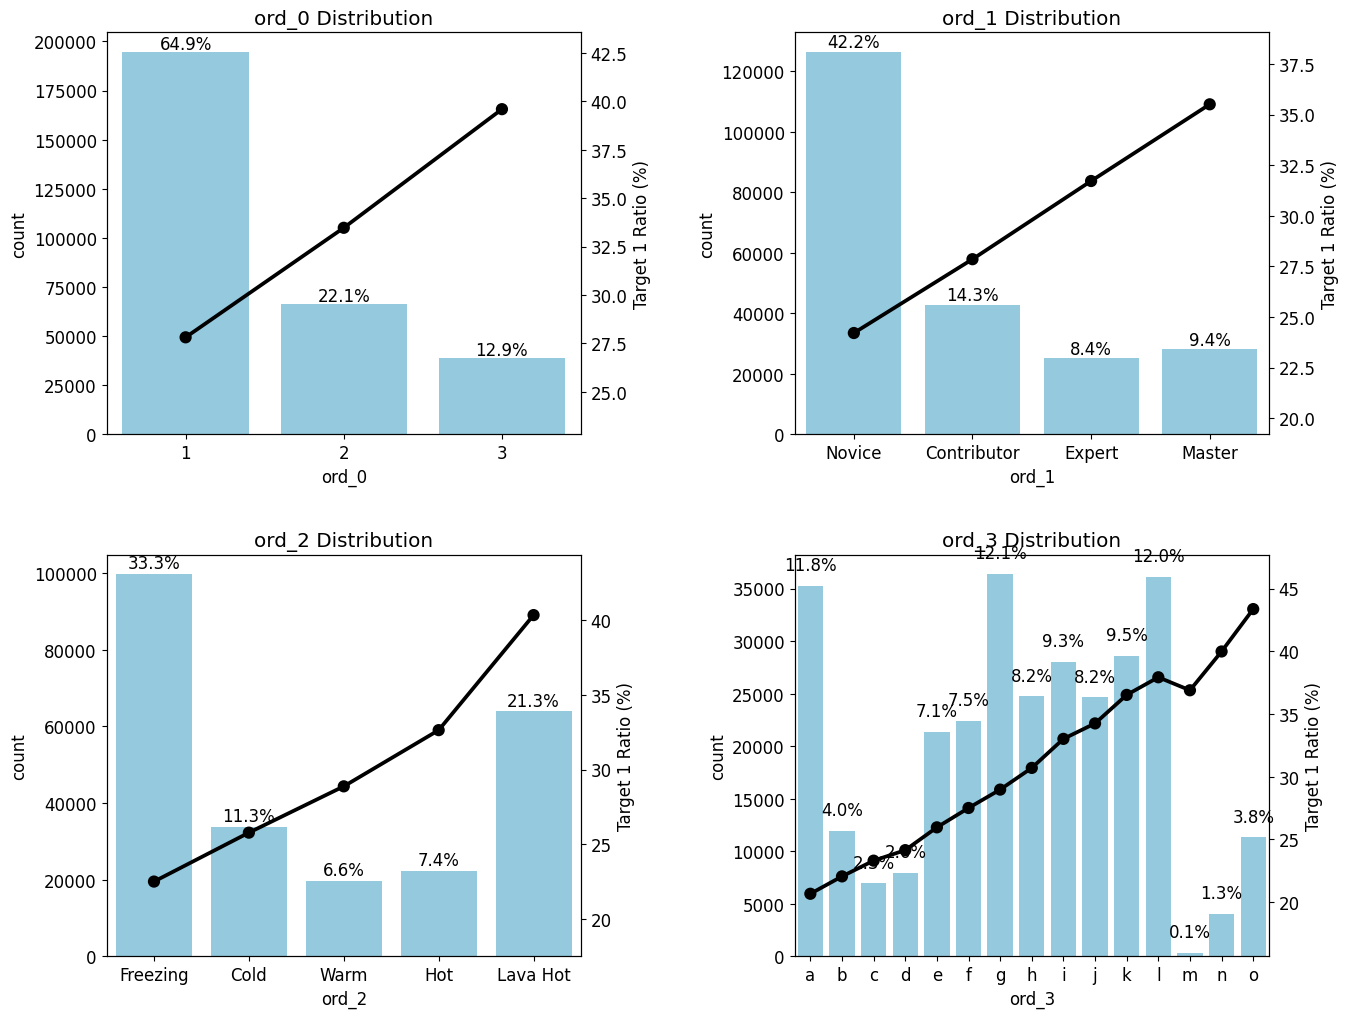

In [55]:
# 순서형 값 정렬 필요 => 다시 그리자!

from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'GrandMaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boling Hot', 'Lava Hot']

ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15,12))

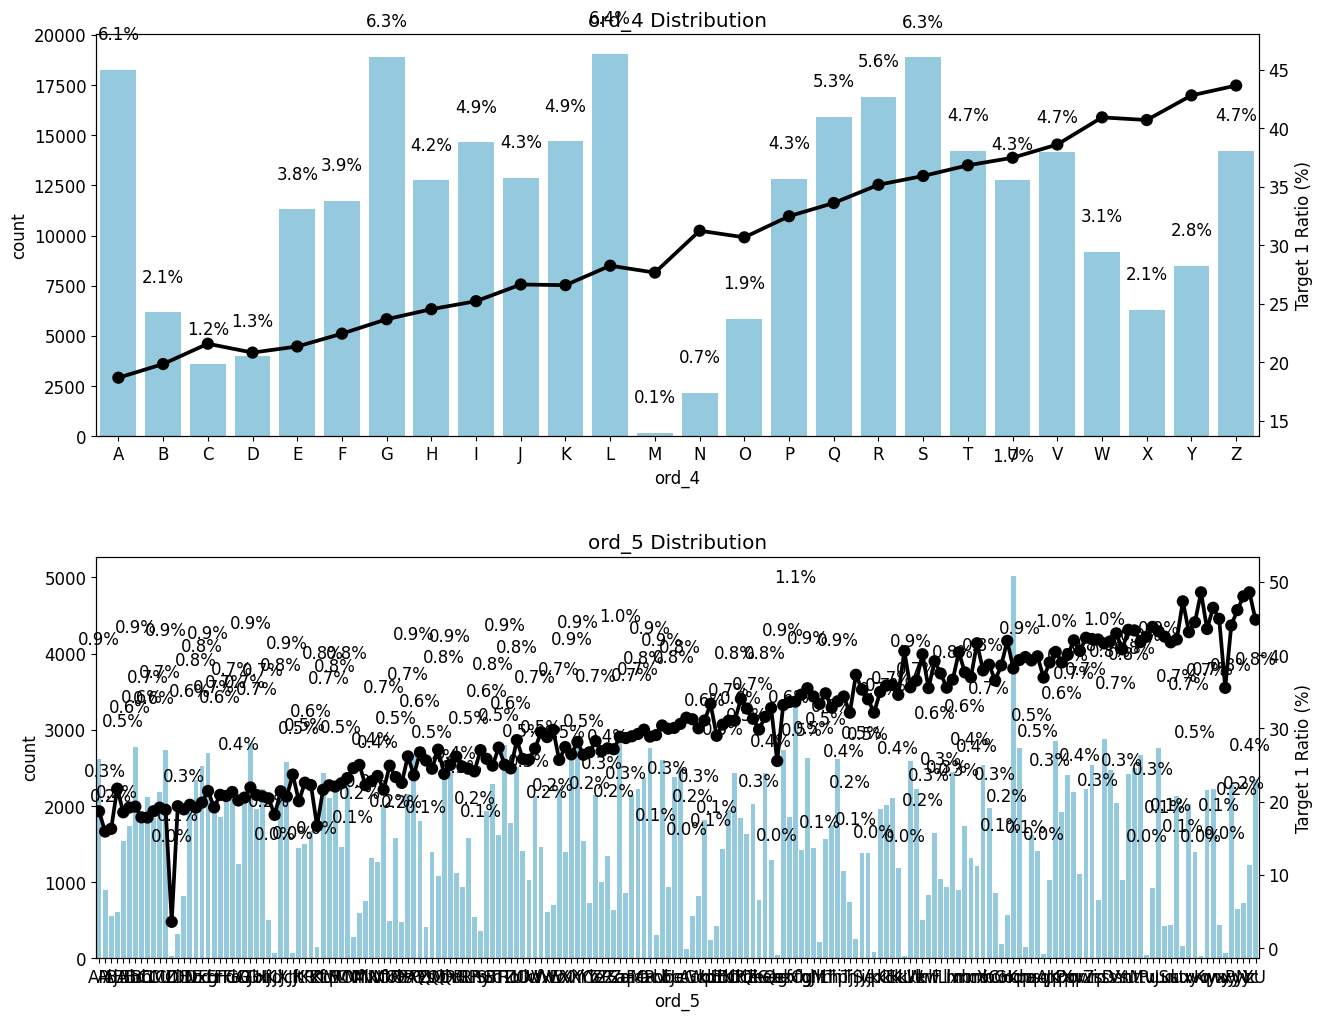

In [58]:
plot_cat_dist_with_true_ratio(train, ['ord_4','ord_5'], num_rows=2, num_cols=1, size=(15,12))

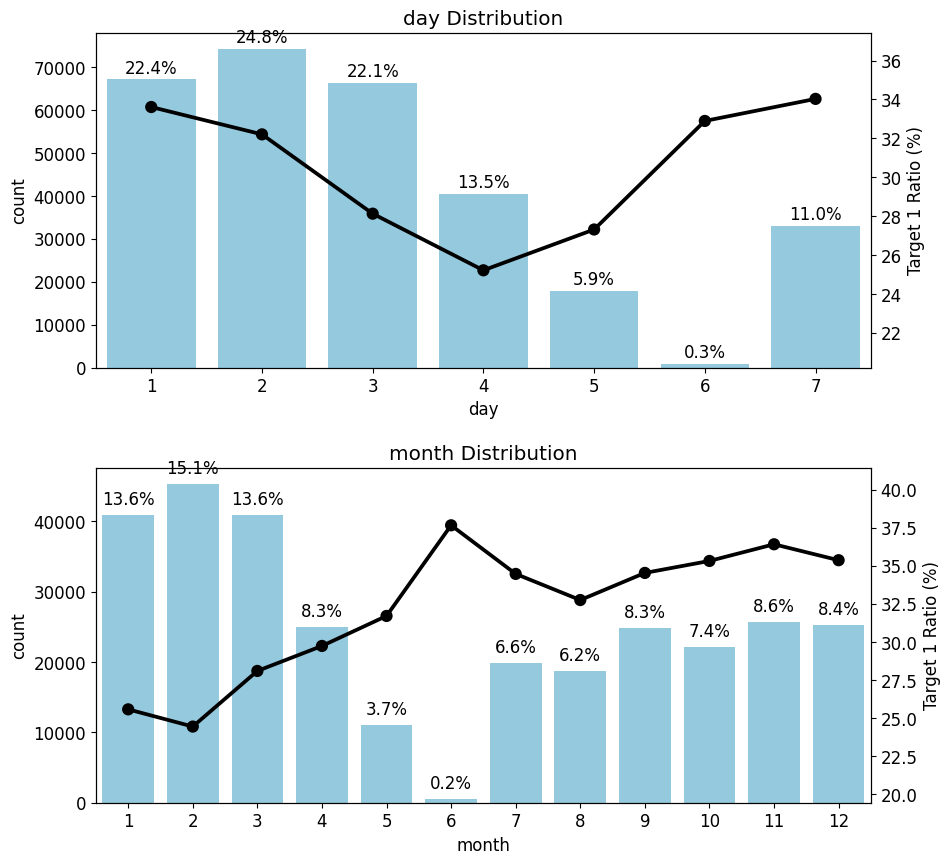

In [59]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, num_rows = 2, num_cols=1, size=(10,10))